In [1]:
import numpy as np
import pandas as pd
import os
import zipfile
import subprocess

In [2]:
# Visualization Packages Importing
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Download Dataset
zip_path = os.path.expanduser('~/Downloads/videogamesales.zip')
if not os.path.exists(zip_path):
    print("Downloading dataset...")
    subprocess.run([
        "curl", "-L", "-o", zip_path,
        "https://www.kaggle.com/api/v1/datasets/download/gregorut/videogamesales"
    ])
    print("Download complete.")

# Extract Dataset
extract_path = os.path.expanduser('~/Downloads/videogamesales')
if not os.path.exists(extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print("Extraction complete.")

In [6]:
# Locate CSV File
file_path = os.path.join(extract_path, 'vgsales.csv')
if not os.path.exists(file_path):
    raise FileNotFoundError(f"Dataset not found at {file_path}. Please ensure the file exists.")

In [45]:
# Data Collection & Loading
df = pd.read_csv(file_path)
print("Dataset successfully loaded from:", file_path)
# Display General Information
df.info()

Dataset successfully loaded from: C:\Users\uckun/Downloads/videogamesales\vgsales.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [11]:
# Data Collection & Loading
df = pd.read_csv(file_path)
print("Dataset successfully loaded from:", file_path)

# Display General Information
df.info()

# Checking Missing Values
missing_values = df.isna().sum()
print("Missing Values in Dataset:\n", missing_values)

# Fill Missing Values
df['Year'].fillna(df['Year'].median(), inplace=True)
df['Year'] = df['Year'].astype(int)
df['Publisher'].fillna(df['Publisher'].mode()[0], inplace=True)


Dataset successfully loaded from: C:\Users\uckun/Downloads/videogamesales\vgsales.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
Missing Values in Dataset:
 Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales        

In [13]:
# Data Exploration & Analysis
print("Statistical Overview:\n", df.describe())

Statistical Overview:
                Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16598.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.416134      0.264667      0.146652      0.077782   
std     4791.853933      5.781686      0.816683      0.505351      0.309291   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4151.250000   2003.000000      0.000000      0.000000      0.000000   
50%     8300.500000   2007.000000      0.080000      0.020000      0.000000   
75%    12449.750000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16598.000000  16598.000000  
mean       0.048063      0.537441  
std        0.188588      1.555028  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.

In [15]:
# Data Exploration & Analysis
print("Statistical Overview:\n", df.describe())

Statistical Overview:
                Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16598.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.416134      0.264667      0.146652      0.077782   
std     4791.853933      5.781686      0.816683      0.505351      0.309291   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4151.250000   2003.000000      0.000000      0.000000      0.000000   
50%     8300.500000   2007.000000      0.080000      0.020000      0.000000   
75%    12449.750000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16598.000000  16598.000000  
mean       0.048063      0.537441  
std        0.188588      1.555028  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.

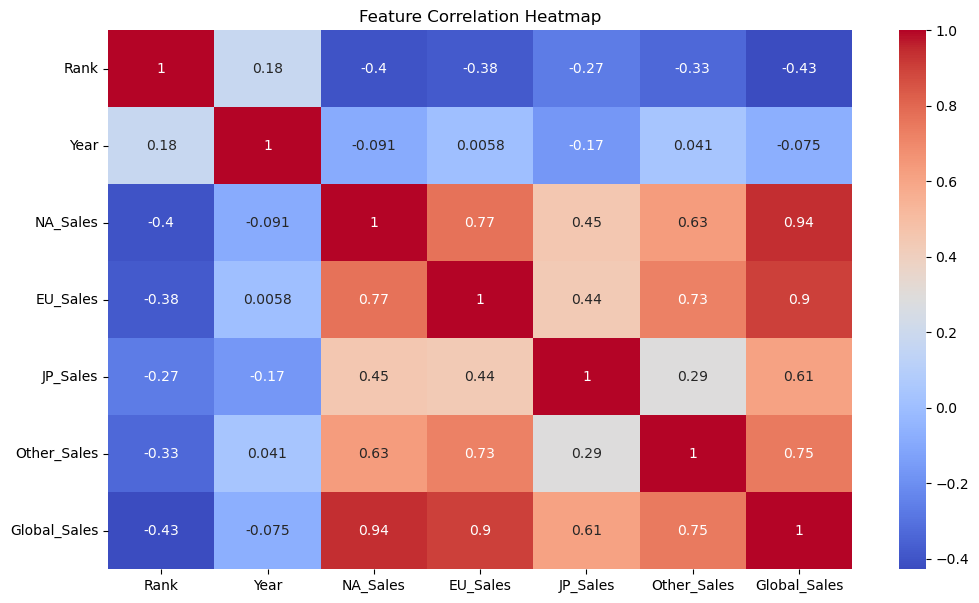

In [17]:
# Correlation Analysis
plt.figure(figsize=(12, 7))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

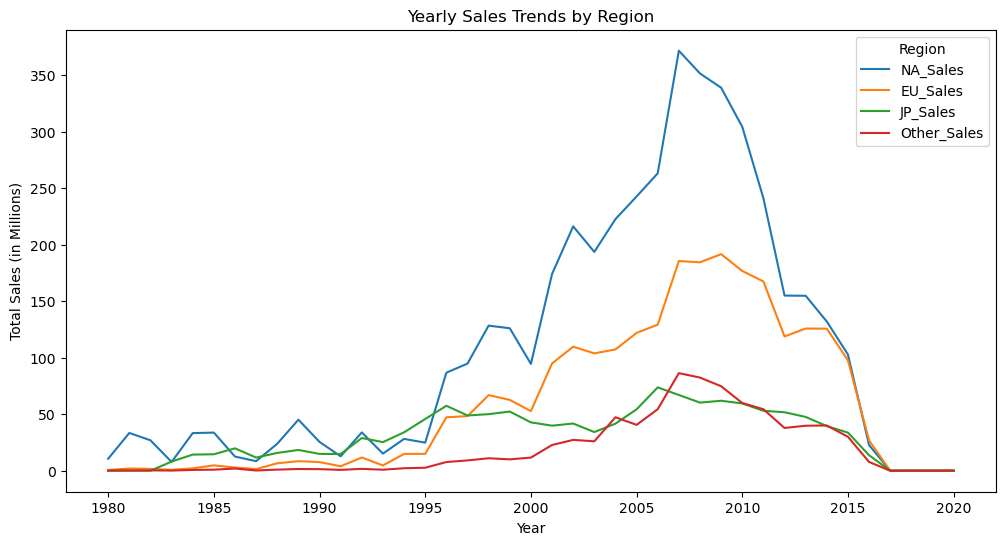

In [121]:
# Yearly Sales Trend
yearly_sales = df.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
yearly_sales.plot(figsize=(12,6), title='Yearly Sales Trends by Region')
plt.xlabel('Year')
plt.ylabel('Total Sales (in Millions)')
plt.legend(title='Region')
plt.show()

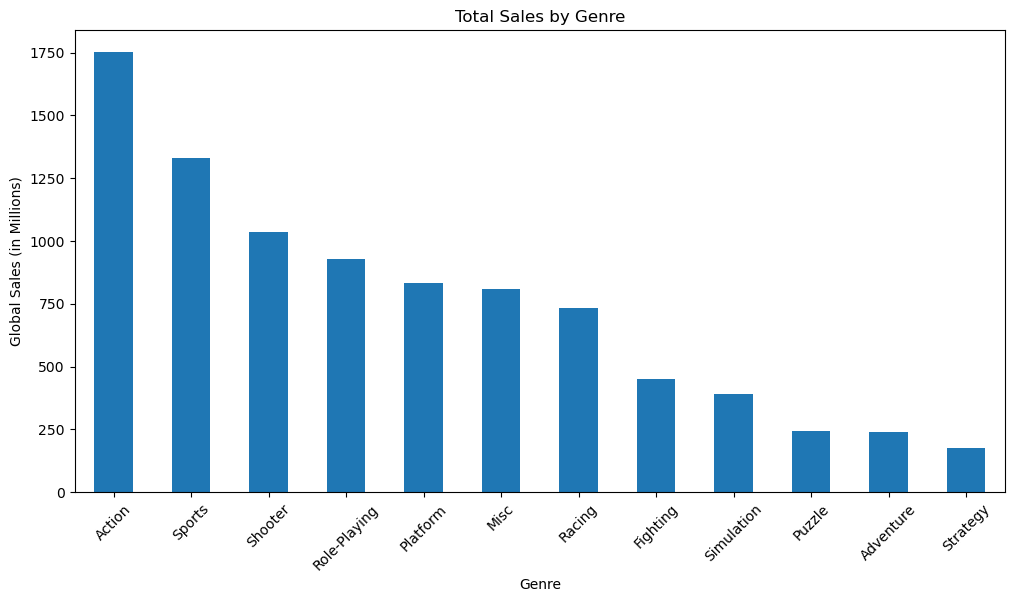

In [123]:
# Genre Sales Analysis
genre_sales = df.groupby('Genre')[['Global_Sales']].sum().sort_values(by='Global_Sales', ascending=False)
genre_sales.plot(kind='bar', figsize=(12,6), title='Total Sales by Genre', legend=False)
plt.xlabel('Genre')
plt.ylabel('Global Sales (in Millions)')
plt.xticks(rotation=45)
plt.show()

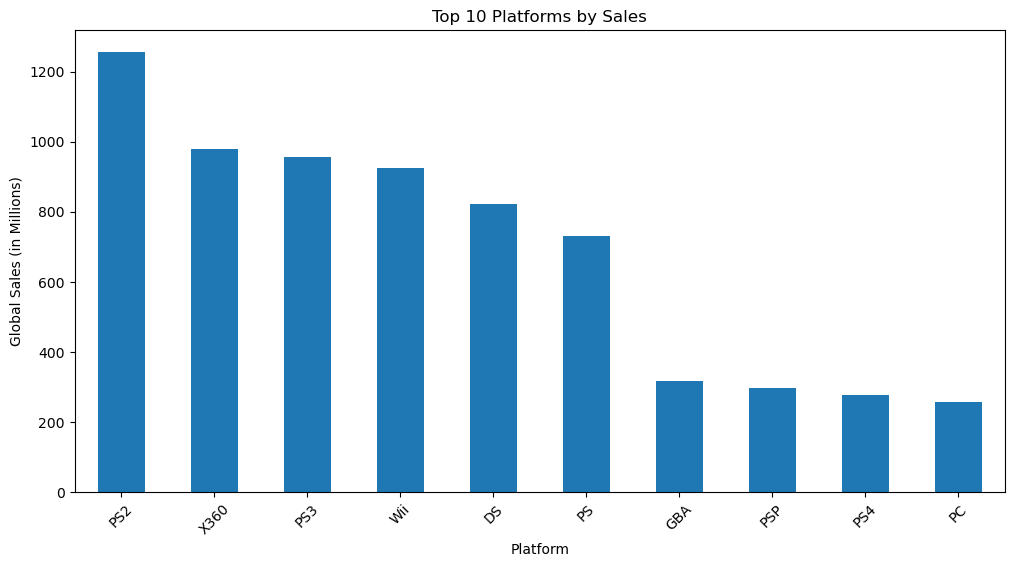

In [125]:
# Top Platforms by Sales
platform_sales = df.groupby('Platform')[['Global_Sales']].sum().sort_values(by='Global_Sales', ascending=False).head(10)
platform_sales.plot(kind='bar', figsize=(12,6), title='Top 10 Platforms by Sales', legend=False)
plt.xlabel('Platform')
plt.ylabel('Global Sales (in Millions)')
plt.xticks(rotation=45)
plt.show()

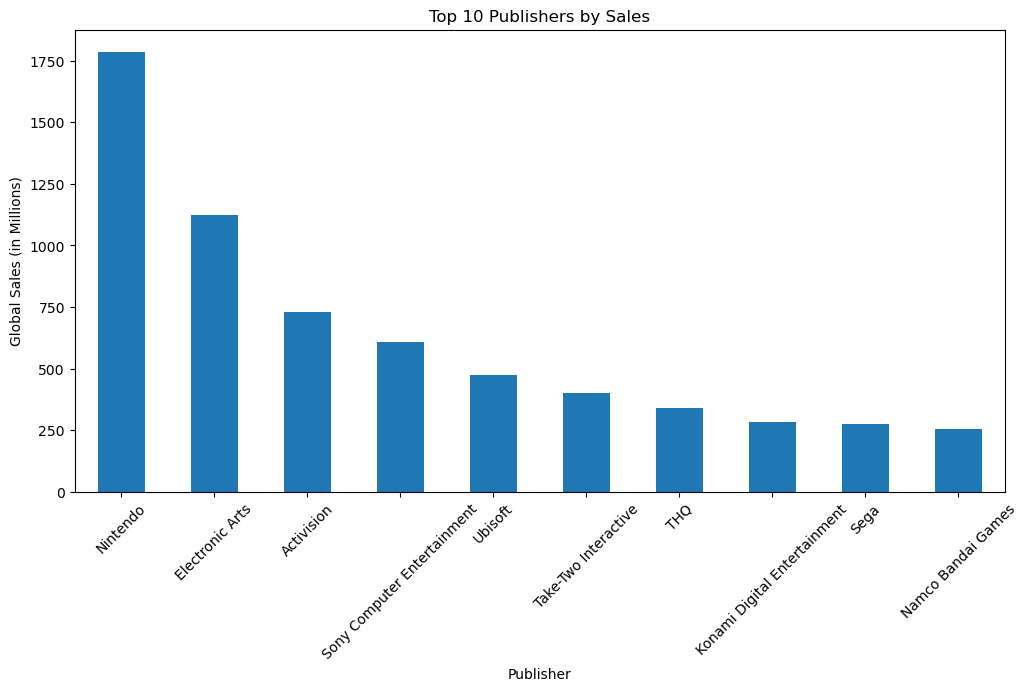

In [127]:
# Top Publishers by Sales
publisher_sales = df.groupby('Publisher')[['Global_Sales']].sum().sort_values(by='Global_Sales', ascending=False).head(10)
publisher_sales.plot(kind='bar', figsize=(12,6), title='Top 10 Publishers by Sales', legend=False)
plt.xlabel('Publisher')
plt.ylabel('Global Sales (in Millions)')
plt.xticks(rotation=45)
plt.show()

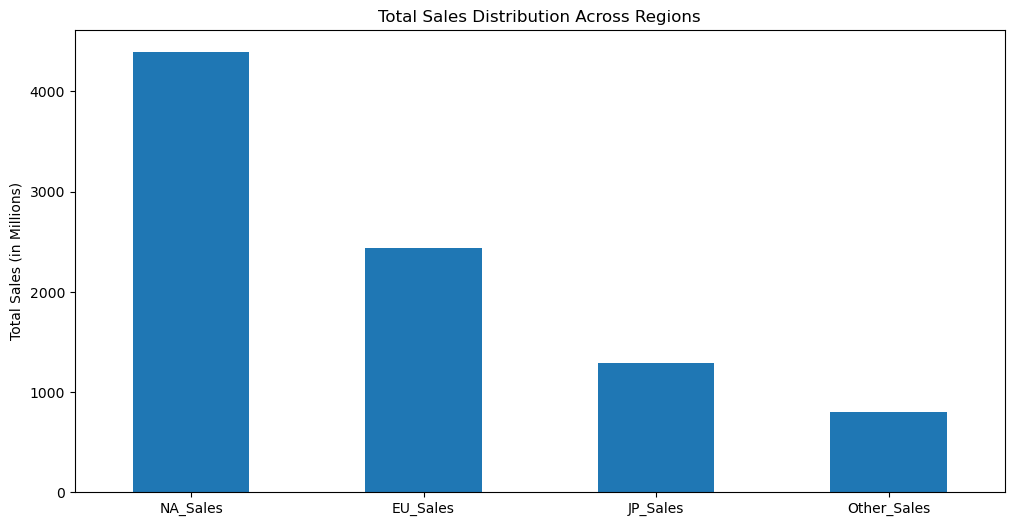

In [129]:
# Sales Distribution Across Regions
plt.figure(figsize=(12, 6))
df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().plot(kind='bar')
plt.title('Total Sales Distribution Across Regions')
plt.ylabel('Total Sales (in Millions)')
plt.xticks(rotation=0)
plt.show()

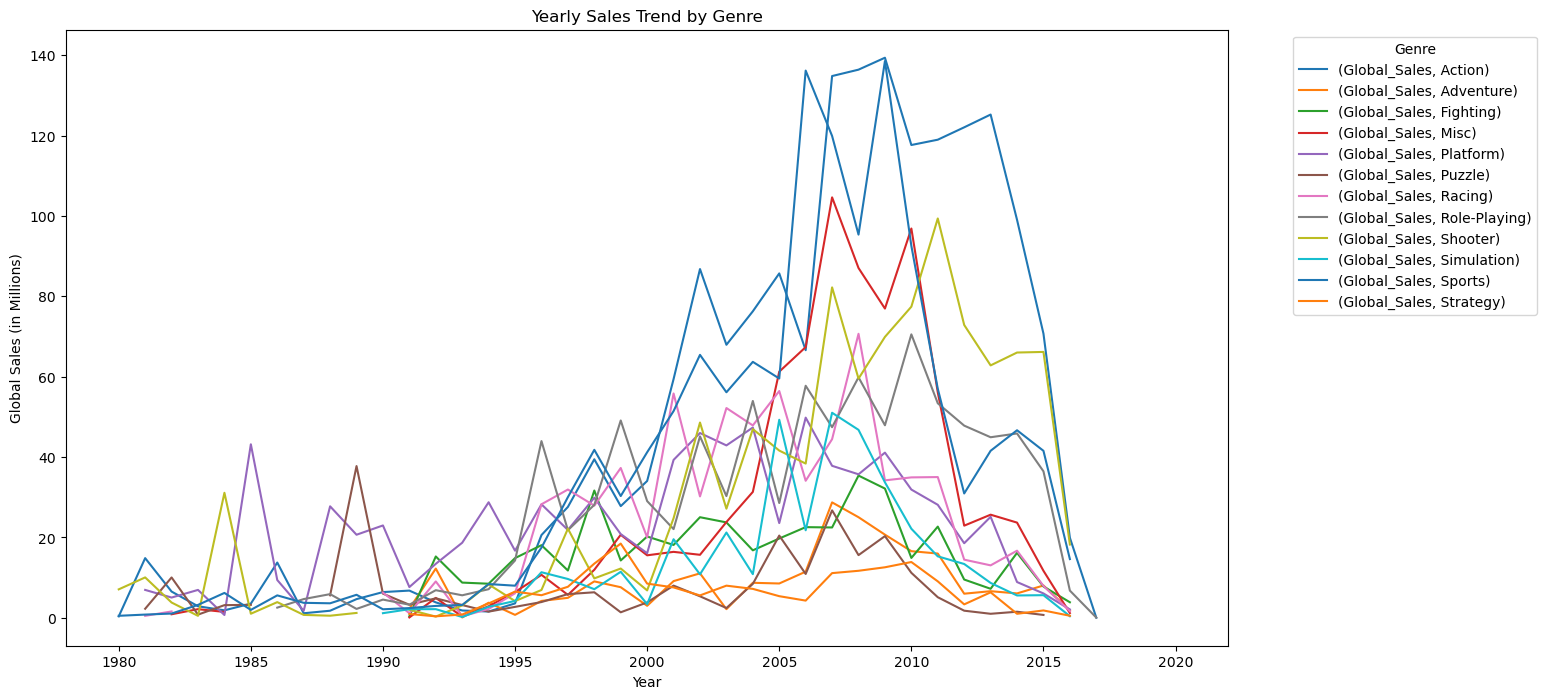

In [131]:
# Yearly Trend for Each Genre
genre_yearly_sales = df.groupby(['Year', 'Genre'])[['Global_Sales']].sum().unstack()
genre_yearly_sales.plot(figsize=(15, 8), title='Yearly Sales Trend by Genre')
plt.xlabel('Year')
plt.ylabel('Global Sales (in Millions)')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

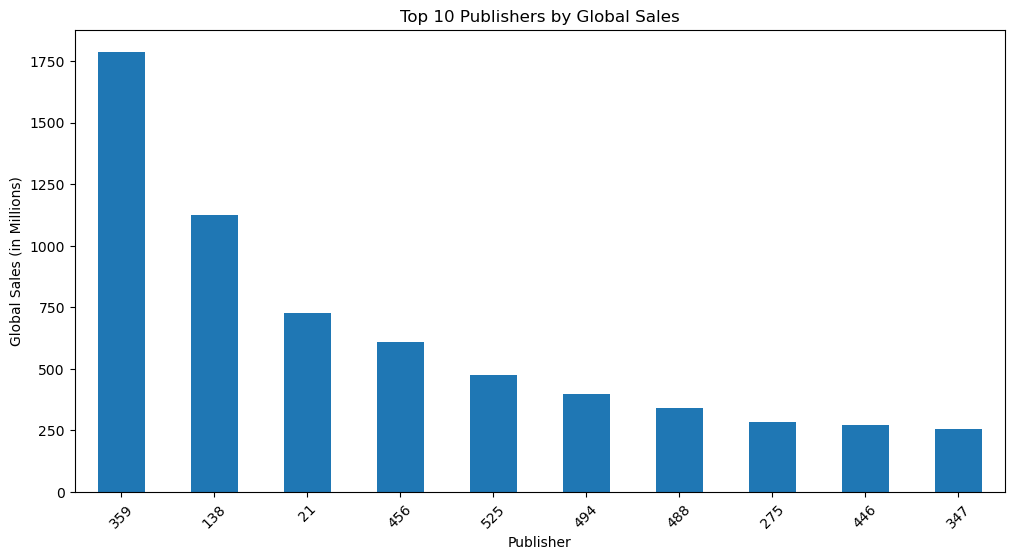

In [101]:
# Publisher-wise Sales Distribution
plt.figure(figsize=(12, 6))
df.groupby('Publisher')['Global_Sales'].sum().nlargest(10).plot(kind='bar')
plt.title('Top 10 Publishers by Global Sales')
plt.ylabel('Global Sales (in Millions)')
plt.xticks(rotation=45)
plt.show()

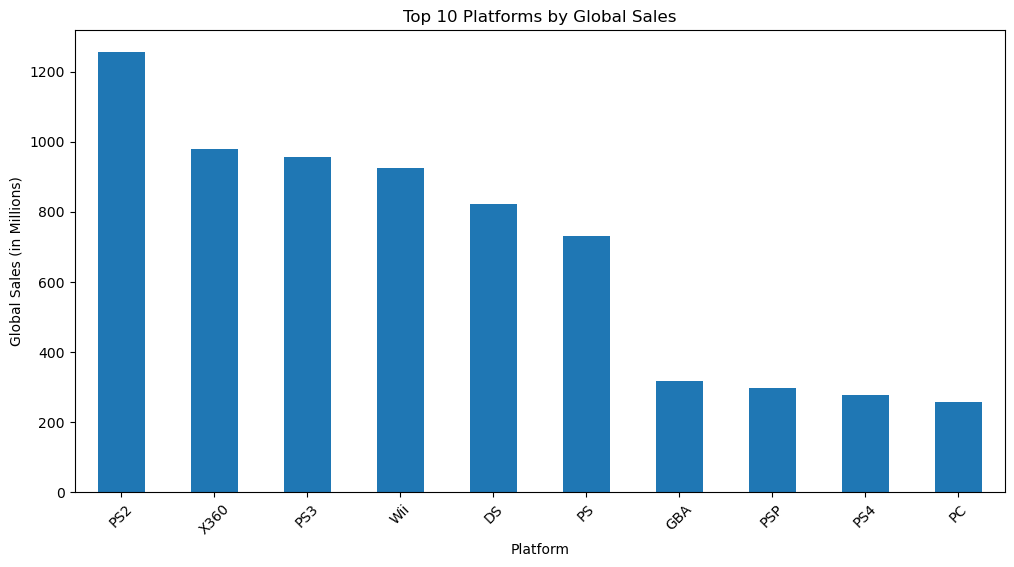

In [135]:
# Platform-wise Global Sales Distribution
plt.figure(figsize=(12, 6))
df.groupby('Platform')['Global_Sales'].sum().nlargest(10).plot(kind='bar')
plt.title('Top 10 Platforms by Global Sales')
plt.ylabel('Global Sales (in Millions)')
plt.xticks(rotation=45)
plt.show()

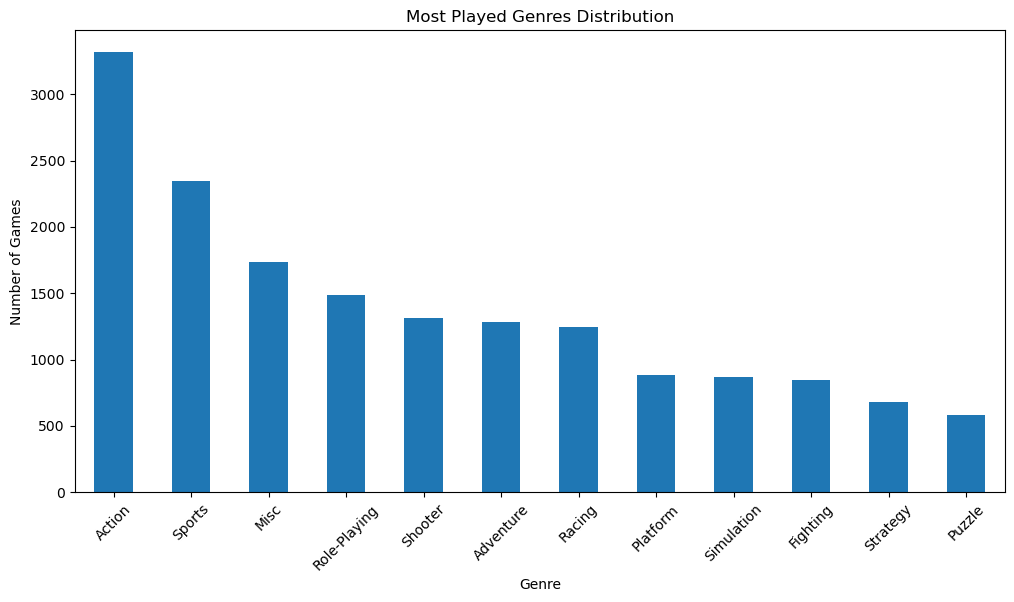

In [147]:
# Distribution of Most Played Genres
plt.figure(figsize=(12,6))
df['Genre'].value_counts().plot(kind='bar')
plt.title('Most Played Genres Distribution')
plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.show()

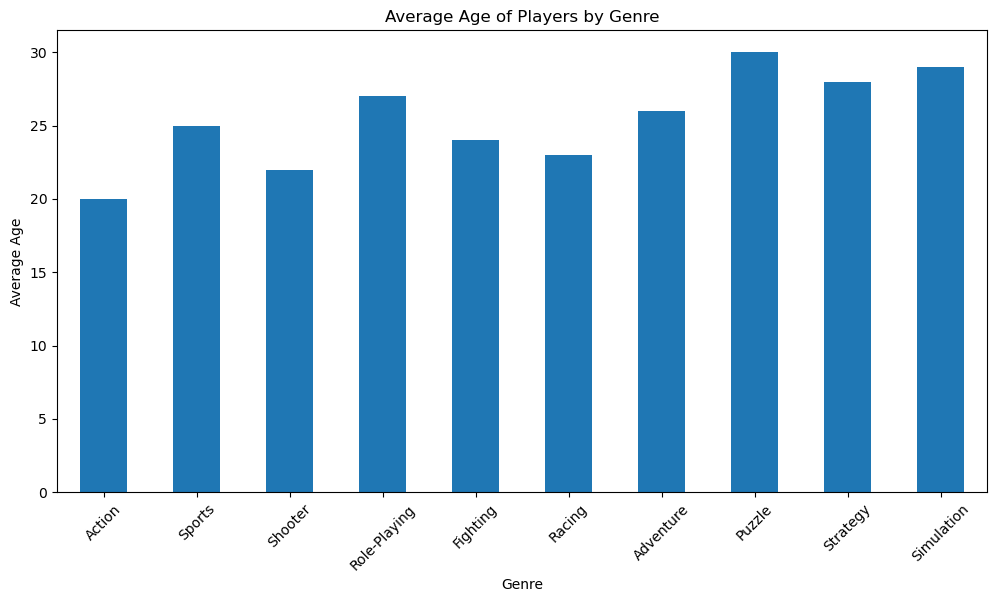

In [149]:
# Age Distribution of Players by Genre (Hypothetical)
age_data = {
    'Action': 20, 'Sports': 25, 'Shooter': 22, 'Role-Playing': 27, 'Fighting': 24,
    'Racing': 23, 'Adventure': 26, 'Puzzle': 30, 'Strategy': 28, 'Simulation': 29
}
plt.figure(figsize=(12,6))
pd.Series(age_data).plot(kind='bar')
plt.title('Average Age of Players by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Age')
plt.xticks(rotation=45)
plt.show()

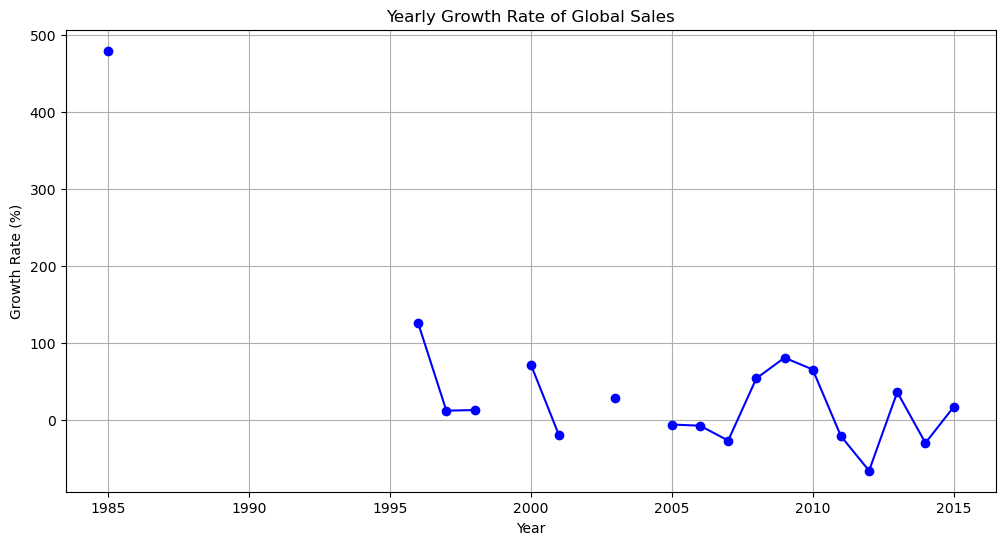

In [155]:
# Yearly Growth Rate of Global Sales
df['Yearly_Growth'] = df.groupby('Year')['Global_Sales'].sum().pct_change() * 100
plt.figure(figsize=(12, 6))
df.groupby('Year')['Yearly_Growth'].mean().plot(kind='line', marker='o', color='blue')
plt.title('Yearly Growth Rate of Global Sales')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.grid()
plt.show()